<a href="https://colab.research.google.com/github/martuscellifaria/Coursera/blob/main/Random_Forests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Random Forest Assignment - Adolescents Health

This is part of the Coursera Machine Learning for Data Analysis course. Analogously to the random example regarding smoking dependence, the objective is to obtain a random forest to investigate many factors influence on members fatigue in adolescents.



#1. Import libraries
Not so much to say about this. The model will require Pandas, Numpy, Matplotlib and Sklearn to be implemented.

In [23]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
# Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

#2. Read the .csv and clean the data
In order to proceed with the analysis, it is needed to drop all the NULL "values" from the file read from the dataset.

In [24]:
AH_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Course ML/addhealth_pds.csv")
data_clean = AH_data.dropna()

data_clean.dtypes
data_clean.describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,22,65,134,135,177,205,206,207,208,346,366,523,532,533,753,755,756,842,843,847,848,849,856,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,966,967,974,979,980,982,986,987,989,991,992,994,1010,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1073,1075,1078,1079,1080,1081,1084,1085,1086,1087,1088,1091,1092,1093,1094,1095,1097,1098,1099,1119,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1184,1185,1186,1187,1190,1191,1192,1193,1194,1197,1198,1199,1200,1201,1219,1221,1222,1235,1236,1237,1238,1239,1240,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,12

,AID,IMONTH,IDAY,IYEAR,SCID,SSCID,COMMID,MACNO,SCH_YR,BIO_SEX,H1GI1M,H1GI1Y,H1GI2,H1GI4,H1GI5A,H1GI5B,H1GI5C,H1GI5D,H1GI5E,H1GI5F,H1GI6A,H1GI6B,H1GI6C,H1GI6D,H1GI6E,H1GI7A,H1GI7B,H1GI7C,H1GI7D,H1GI7E,H1GI7F,H1GI7G,H1GI8,H1GI9,H1GI10,H1GI11,H1GI12,H1GI13M,H1GI13Y,H1GI14,...,H1WS2F,H1WS3F,H1WS4F,H1WS5F,H1WS6F,H1WS7F,H1WS8F,H1WS9F,H1WS10F,H1WS11F,H1WS12F,STUDSIBG,TWING,H1WS1G,H1WS2G,H1WS3G,H1WS4G,H1WS5G,H1WS6G,H1WS7G,H1WS8G,H1WS9G,H1WS10G,H1WS11G,H1WS12G,H1WS13,SMP01,SMP11,SMP06,SMP04,SMP03,SMP02,SMP05,SMP09,SMP10,SMP12,SMP07,SMP08,CLUSTER1,CLUSTER2
count,6.504000e+03,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,...,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000
mean,9.417178e+07,6.577645,15.735855,94.999846,84.143143,105.683733,441.332565,100227.341328,0.354397,1.516759,6.604090,78.970941,0.542589,0.141605,6.271525,6.214022,6.214637,6.222940,6.222325,6.221095,0.682349,0.271064,0.058426,0.063653,0.087485,6.719711,6.726015,6.715713,6.712485,6.716328,6.713715,6.717405,6.766144,1.565959,1.094557,2.136224,946.006458,92.111777,96.373924,6.584102,...,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.038130,0.933579,0.016759,0.003229,0.001076,0.079951,0.006150,0.003998,0.010148,0.003229,0.003998,0.024600,0.036439,441.332565,185.143143
std,6.550036e+06,1.403560,8.708040,0.012400,68.233921,71.703814,22.289236,130.220525,0.483165,0.502825,3.905455,1.809704,0.575287,0.554653,2.047885,2.203267,2.201672,2.179996,2.181610,2.184834,0.603661,0.587574,0.450161,0.455230,0.476936,1.352976,1.323661,1.371227,1.385784,1.368436,1.380258,1.363537,1.086544,1.032436,0.380771,2.440978,203.542871,20.483431,2.803817,1.635471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706785,0.249035,0.128377,0.056735,0.032791,0.271238,0.078187,0.063104,0.100231,0.056735,0.063104,0.154915,0.187395,22.289236,68.233921
min,5.710027e+07,1.000000,1.000000,94.000000,1.000000,1.000000,401.000000,100001.000000,0.000000,1.000000,1.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,77.000000,0.000000,...,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,401.000000,102.000000
25%,9.257287e+07,5.000000,8.000000,95.000000,33.000000,44.000000,421.000000,100110.000000,0.000000,1.000000,4.000000,78.000000,0.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000,1.000000,997.000000,97.000000,97.000000,7.000000,...,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,421.000000,134.000000
50%,9.471444e+07,6.000000,15.000000,95.000000,67.000000,94.000000,442.000000,100225.000000,0.000000,2

#3. Set predictor variables, target and define test and training sets

In [25]:
predictors = data_clean[['IMONTH','IDAY','BIO_SEX','MACNO','SCH_YR','SCID',
'SSCID','COMMID']]


targets = data_clean.H1GH1A

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(2602,)

#4. Run the random forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=9)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

0.9742505764796311

#5. Fit an extra trees model to the data

In [29]:
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

#6. Display the relative importance of each attribute

In [30]:
print(model.feature_importances_)

[0.54484567 0.10871135 0.00806204 0.06677634 0.12823839 0.05955382
 0.05010735 0.03370503]


#7. Return a graphic mapping the accuracy based on tree size

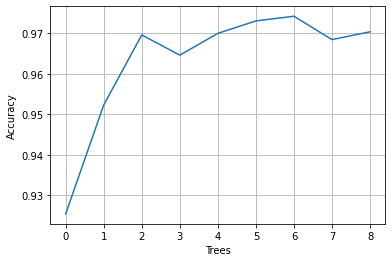

In [31]:
trees=range(9)
accuracy=np.zeros(9)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()

#8. Conclusion
The random forest model has shown that a single decision tree performs well on accuracy (>95%) and tends to 97% increasing the number of trees.